# PROJETO 04 - BigData Python com Spark
Prevendo Customer Churn em Operadoras
de Telecom
Relatório destinado a explicação do projeto a um
Cientista de Dados
Utilizada a linguagem de programação Python e o
Microsoft Azure Machine Learning para tratamento
dos dados
e criação do modelo preditivo de Machine
Learning
ANÁLISE EXPLORATÓRIA


In [1]:
# Realizado no Azure ML a normalização através do método Zscore que apresentou melhores resultados nos
# algoritmos do que o MinMax, Tahn e Logistic.
# Realizado também o balanceamento da variável target churn através do módulo SMOTE
# Dados resultantes foram importados para o Python através do Azure_train_Zscore.csv

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
df = pd.read_csv('Azure_train_Zscore.csv')
df.shape

(5748, 16)

In [3]:
df.head()

account_length  number_vmail_messages  total_day_minutes  total_day_calls  \
0        0.676489               1.234883           1.566767         0.476643   
1        0.149065               1.307948          -0.333738         1.124503   
2        0.902529              -0.591760           1.168304         0.675985   
3       -0.428590              -0.591760           2.196596        -1.466936   
4       -0.654629              -0.591760          -0.240090         0.626149   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0          1.567036          -0.070610        -0.055940         -0.070427   
1         -0.334013          -0.108080         0.144867         -0.107549   
2          1.168464          -1.573383         0.496279         -1.573900   
3          2.196759          -2.742865        -0.608159         -2.743268   
4         -0.240041          -1.038932         1.098699         -1.037939   

   total_night_minutes  total_night_calls  total_night_charge  \
0             0.866743          -0.465494            0.866029   
1             1.058571           0.147825            1.059390   
2            -0.756869           0.198935           -0.755571   
3            -0.078551          -0.567714           -0.078806   
4            -0.276311           1.067803           -0.276562   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0           -0.085008         -0.601195          -0.085690   
1            1.240482         -0.601195           1.241169   
2            0.703121          0.211534           0.697156   
3           -1.303026          1.024263          -1.306401   
4           -0.049184         -0.601195          -0.045885   

   number_customer_service_calls churn  
0                      -0.427932    no  
1                      -0.427932    no  
2                      -1.188218    no  
3                       0.332354    no  
4                       1.092641    no

In [4]:
df.churn.replace(('yes', 'no'), (1, 0), inplace=True)

In [5]:
# Distribuição das classes
df.groupby('churn').size()

churn
0    2850
1    2898
dtype: int64

In [6]:
import seaborn as sns

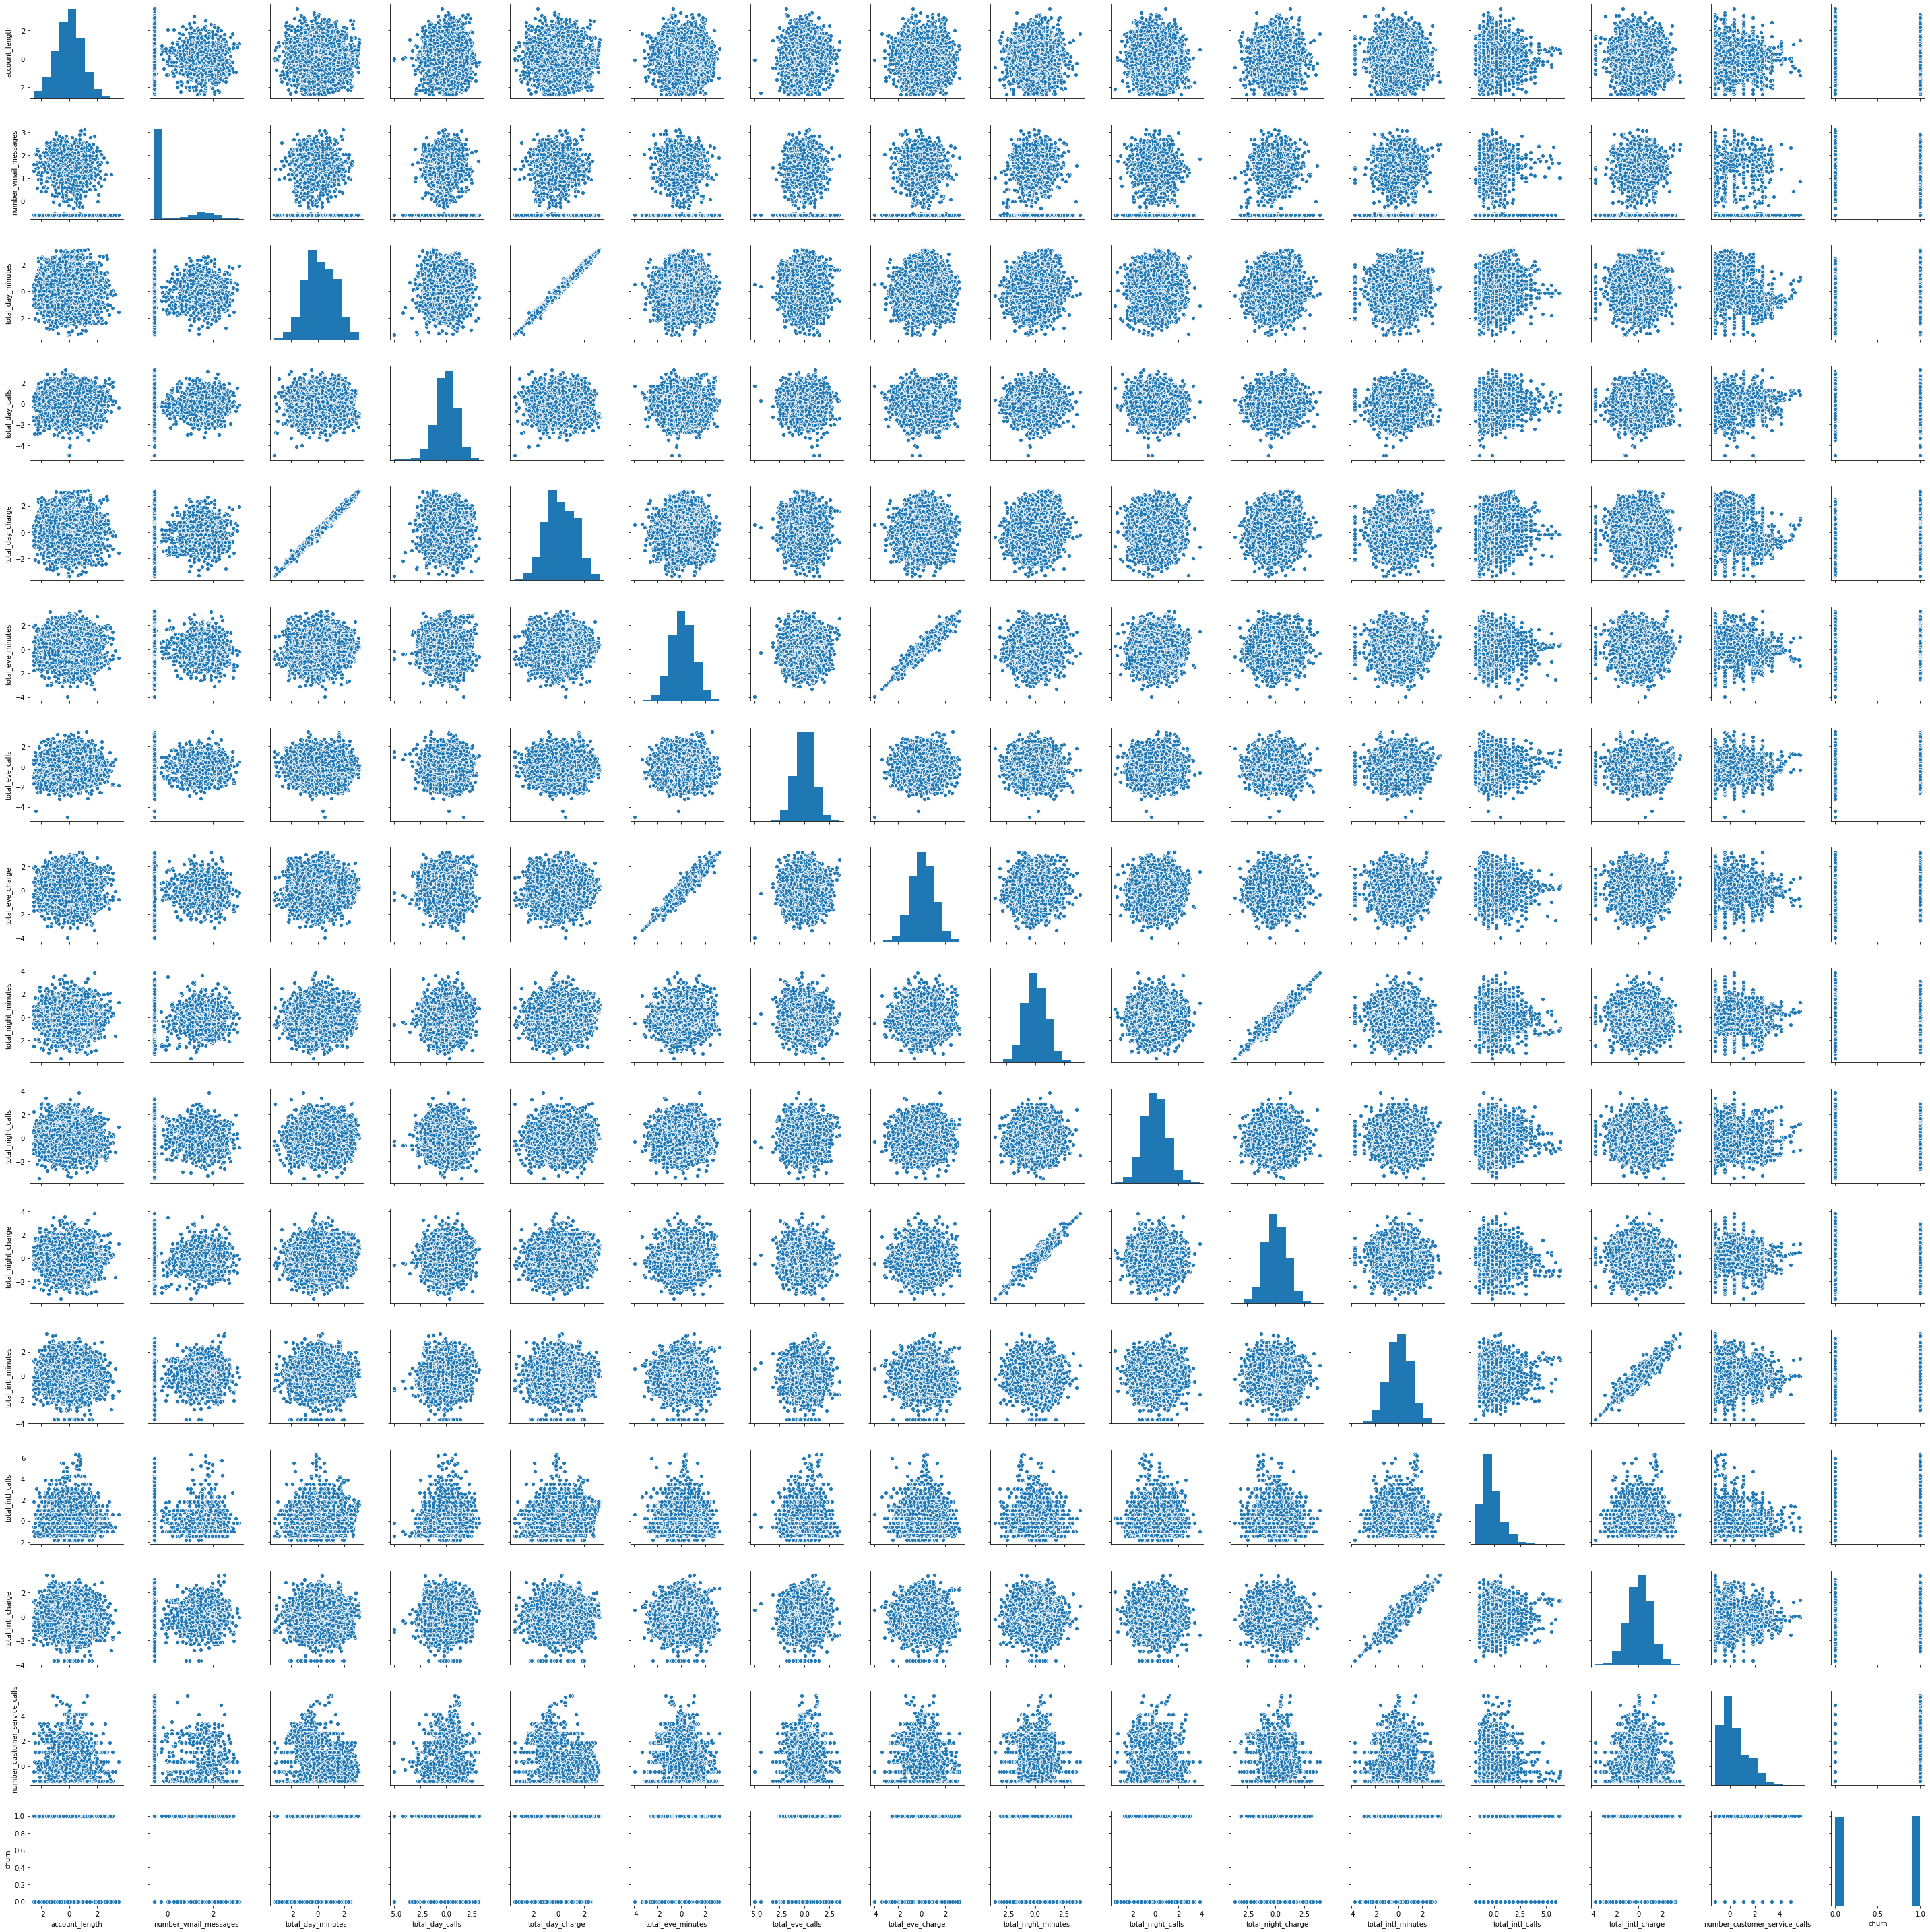

In [7]:
# Pairplot
sns.pairplot(df);

In [8]:
# Deletando as variáveis colineares
df.drop('total_day_charge', axis=1, inplace=True)
df.drop('total_eve_charge', axis=1, inplace=True)
df.drop('total_night_charge', axis=1, inplace=True)
df.drop('total_intl_charge', axis=1, inplace=True)

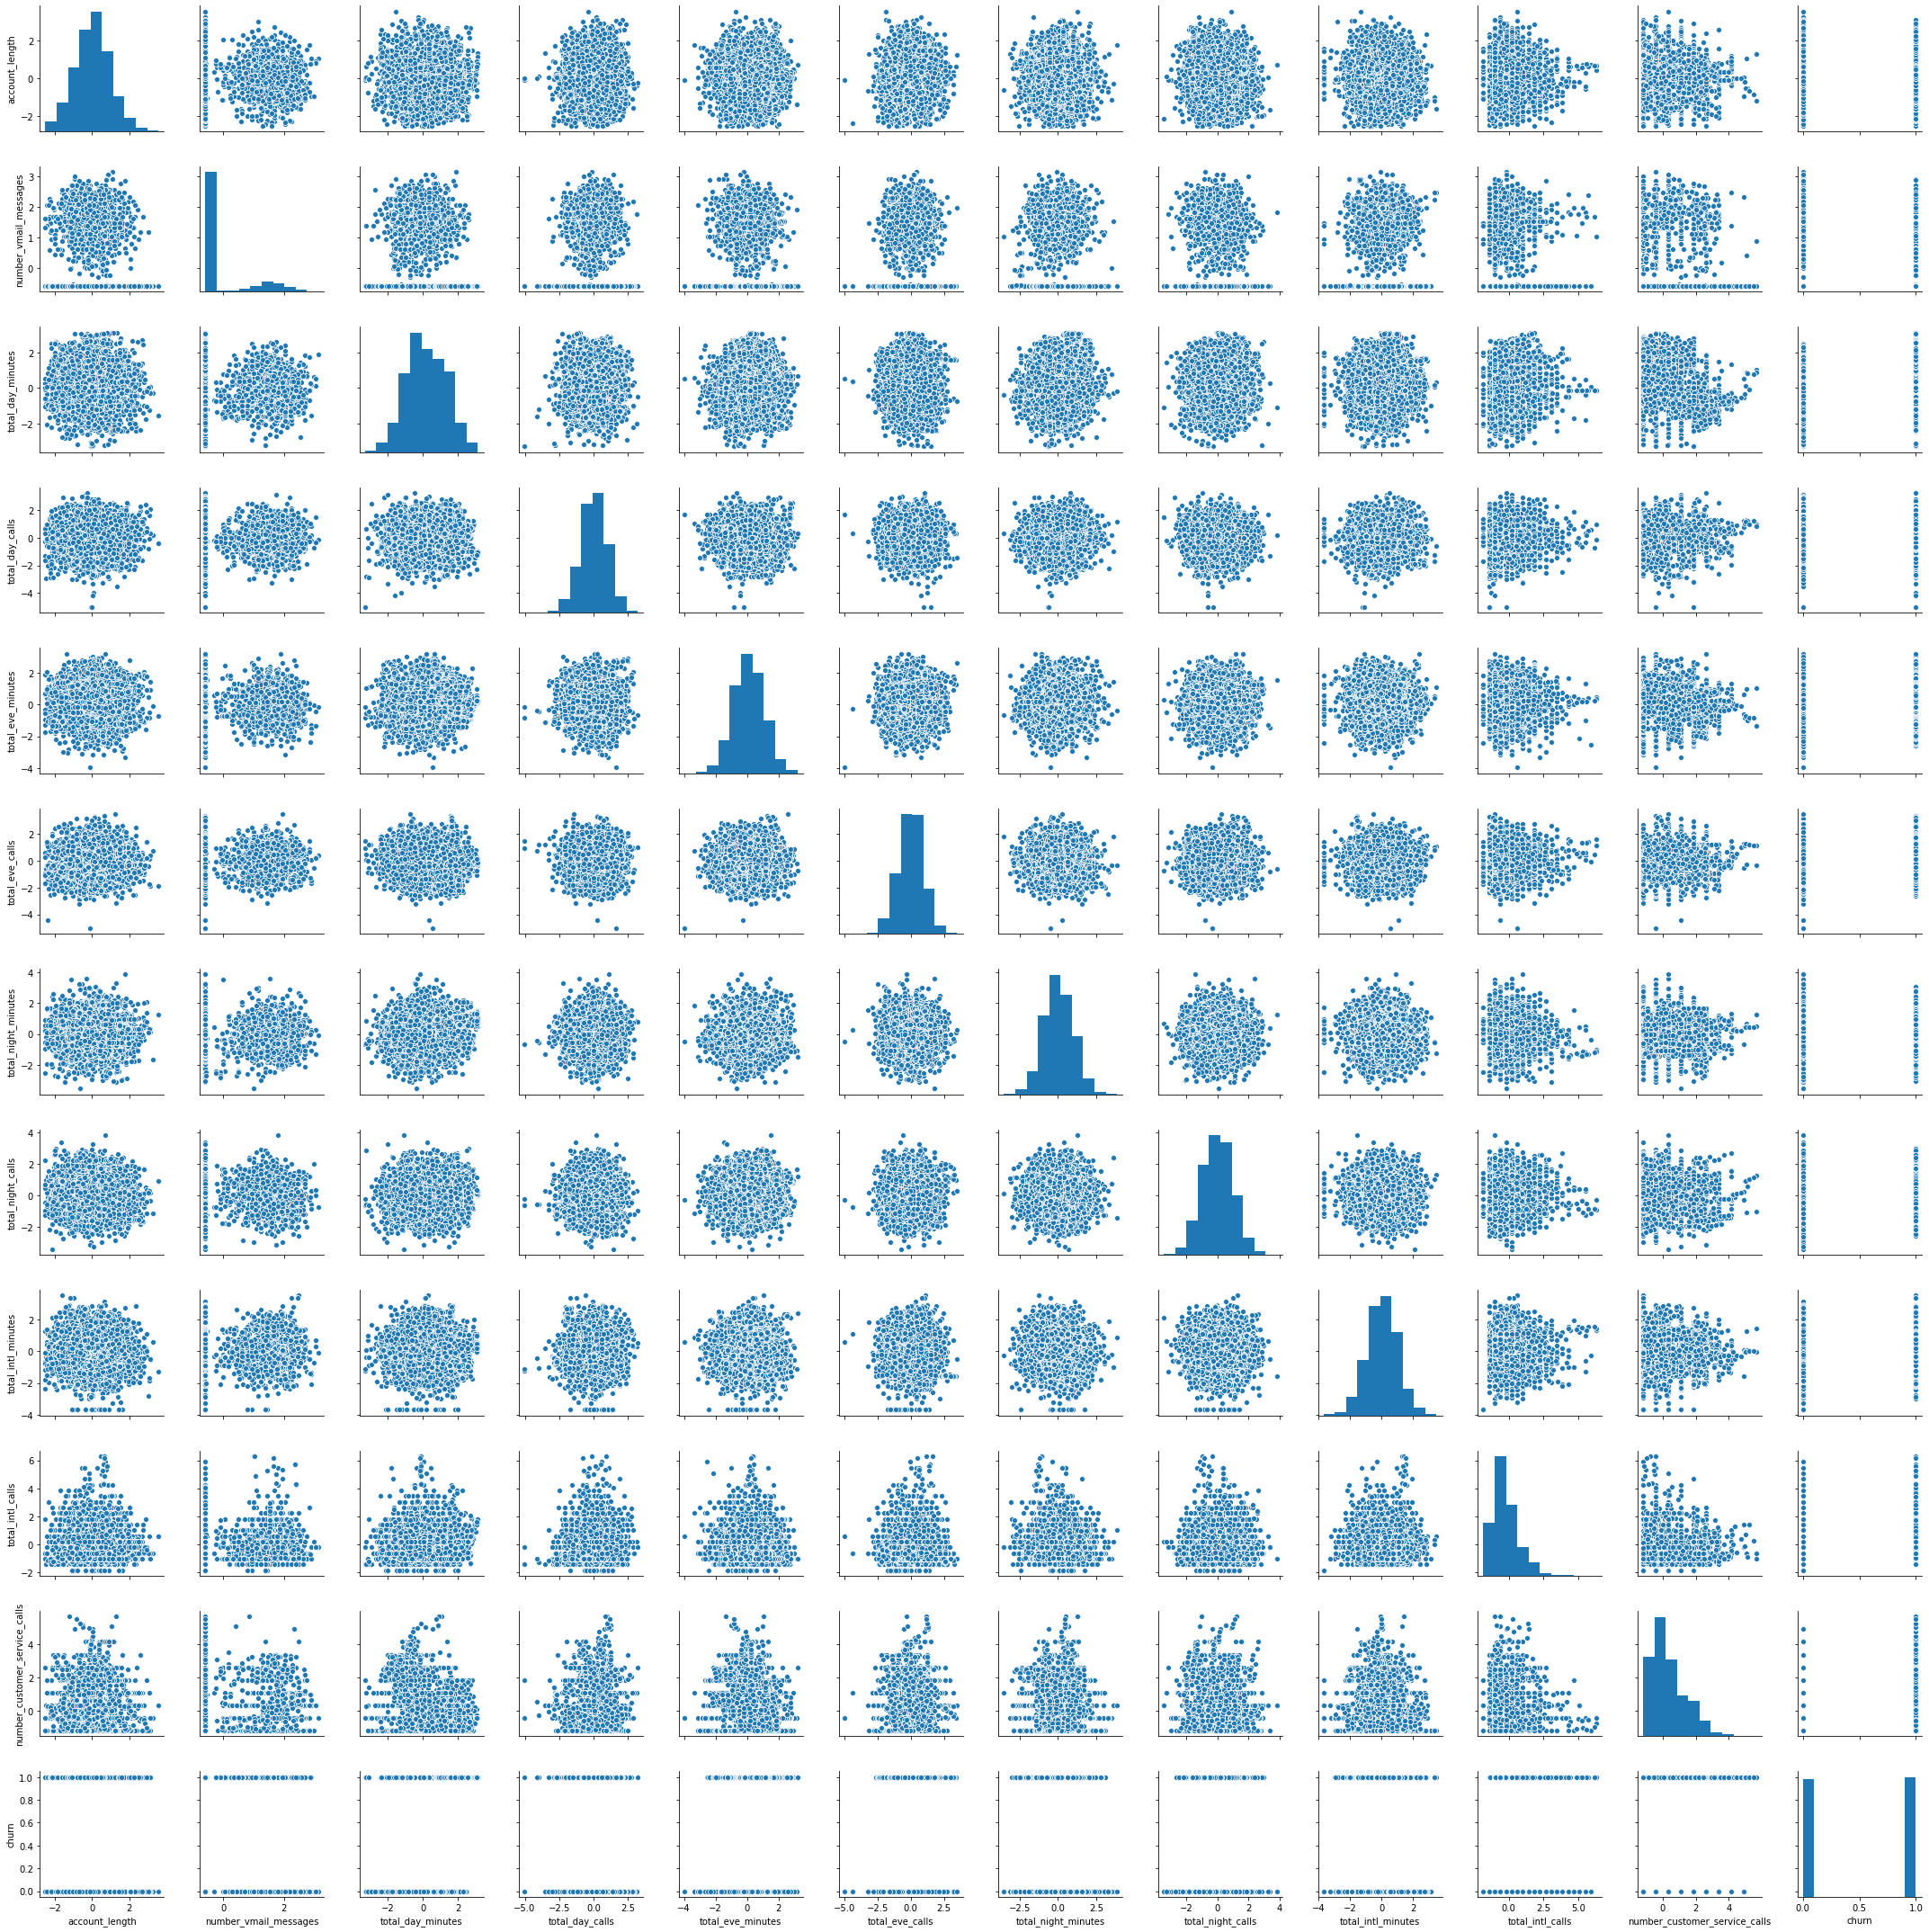

In [9]:
sns.pairplot(df);

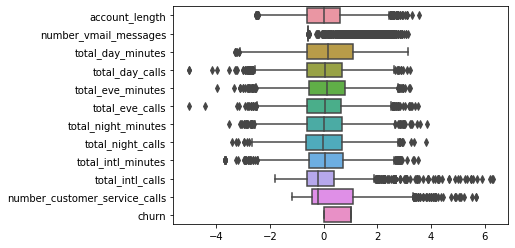

In [10]:
sns.boxplot(data = df,orient = "h");

# Análise dos resultados dos algoritmos

In [11]:
Accuracy = []
ROC = []
Average_Precision = []
Algoritmo = []

# Regressão Logística

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# Separando o array em componentes de input e output
array = df.values
X = array[:,0:11]
Y = array[:,11]
# Definindo os valores para o número de folds
num_folds = 10
seed = 7
# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)
# Criando o modelo
modelo = LogisticRegression()
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
resultado3 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'average_precision')

# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))
print("Average Precision: %.3f" % (resultado3.mean() * 100))
Accuracy.append((resultado.mean() * 100))
ROC.append((resultado2.mean() * 100))
Average_Precision.append((resultado3.mean() * 100))
Algoritmo.append('Regressão Logística')

Acurácia: 71.886
ROC: 77.409
Average Precision: 75.775


# Linear Discriminant Analysis

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Criando o modelo
modelo = LinearDiscriminantAnalysis()
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
resultado3 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'average_precision')
# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))
print("Average Precision: %.3f" % (resultado3.mean() * 100))
Accuracy.append((resultado.mean() * 100))
ROC.append((resultado2.mean() * 100))
Average_Precision.append((resultado3.mean() * 100))
Algoritmo.append('Linear Discriminant Analysis')

Acurácia: 71.764
ROC: 77.395
Average Precision: 75.834


# KNN - K-Nearest Neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier
# Criando o modelo
modelo = KNeighborsClassifier()
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
resultado3 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'average_precision')
# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))
print("Average Precision: %.3f" % (resultado3.mean() * 100))
Accuracy.append((resultado.mean() * 100))
ROC.append((resultado2.mean() * 100))
Average_Precision.append((resultado3.mean() * 100))
Algoritmo.append('KNN - K-Nearest Neighborss')

Acurácia: 89.248
ROC: 97.172
Average Precision: 94.876


# Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
# Criando o modelo
modelo = GaussianNB()
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
resultado3 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'average_precision')
# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))
print("Average Precision: %.3f" % (resultado3.mean() * 100))
Accuracy.append((resultado.mean() * 100))
ROC.append((resultado2.mean() * 100))
Average_Precision.append((resultado3.mean() * 100))
Algoritmo.append('Naive Bayes')

Acurácia: 73.887
ROC: 81.049
Average Precision: 81.604


# CART (Classification and Regression Trees)

In [16]:
from sklearn.tree import DecisionTreeClassifier
# Criando o modelo
modelo = DecisionTreeClassifier()
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
resultado3 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'average_precision')
# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))
print("Average Precision: %.3f" % (resultado3.mean() * 100))
Accuracy.append((resultado.mean() * 100))
ROC.append((resultado2.mean() * 100))
Average_Precision.append((resultado3.mean() * 100))
Algoritmo.append('CART')

Acurácia: 89.753
ROC: 89.595
Average Precision: 85.102


# Algoritmo XGBoost - Extreme Gradient Boosting

In [17]:
from xgboost import XGBClassifier
# Criando o modelo
modelo = XGBClassifier()
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
resultado3 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'average_precision')
# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))
print("Average Precision: %.3f" % (resultado3.mean() * 100))
Accuracy.append((resultado.mean() * 100))
ROC.append((resultado2.mean() * 100))
Average_Precision.append((resultado3.mean() * 100))
Algoritmo.append('XGBoost')

Acurácia: 95.807
ROC: 98.561
Average Precision: 98.918


# Bagged Decision Trees

In [18]:
from sklearn.ensemble import BaggingClassifier
# Definindo os valores para o número de folds
num_folds = 10
# Separando os dados em folds
kfold = KFold(num_folds, True)
# Cria o modelo unitário (classificador fraco)
cart = XGBClassifier()
# Definindo o número de trees
num_trees = 100
# Criando o modelo bagging
modelo = BaggingClassifier(base_estimator = modelo, n_estimators = num_trees)
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
resultado3 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'average_precision')
# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))
print("Average Precision: %.3f" % (resultado3.mean() * 100))
Accuracy.append((resultado.mean() * 100))
ROC.append((resultado2.mean() * 100))
Average_Precision.append((resultado3.mean() * 100))
Algoritmo.append('Bagged_DT')

Acurácia: 95.895
ROC: 98.647
Average Precision: 98.981


# AdaBoost

In [19]:
from sklearn.ensemble import AdaBoostClassifier
# Definindo os valores para o número de folds
num_folds = 10
# Separando os dados em folds
kfold = KFold(num_folds, True)
# Cria o modelo unitário (classificador fraco)
cart = KNeighborsClassifier()
# Definindo o número de trees
num_trees = 30
# Criando o modelo bagging
modelo = AdaBoostClassifier(n_estimators = num_trees)
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
resultado3 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'average_precision')
# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))
print("Average Precision: %.3f" % (resultado3.mean() * 100))
Accuracy.append((resultado.mean() * 100))
ROC.append((resultado2.mean() * 100))
Average_Precision.append((resultado3.mean() * 100))
Algoritmo.append('AdaBoost')

Acurácia: 84.029
ROC: 90.371
Average Precision: 90.263


# Voting Ensemble

In [20]:
from sklearn.ensemble import VotingClassifier
estimators = []
modelo1 = KNeighborsClassifier()
estimators.append(('KNN', modelo1))
modelo2 = DecisionTreeClassifier()
estimators.append(('CART', modelo2))
modelo3 = XGBClassifier()
estimators.append(('XGBoosting', modelo3))
modelo = VotingClassifier(estimators, voting='soft')
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
resultado3 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'average_precision')
# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))
print("Average Precision: %.3f" % (resultado3.mean() * 100))
Accuracy.append((resultado.mean() * 100))
ROC.append((resultado2.mean() * 100))
Average_Precision.append((resultado3.mean() * 100))
Algoritmo.append('Voting_Ensemble')

Acurácia: 94.885
ROC: 99.179
Average Precision: 99.264


# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
# Definindo os valores para o número de folds
num_folds = 10
# Separando os dados em folds
kfold = KFold(num_folds, True)
# Cria o modelo unitário (classificador fraco)
cart = XGBClassifier()
# Definindo o número de trees
num_trees = 100
max_features = 3
# Criando o modelo bagging
modelo = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
resultado3 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'average_precision')
# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))
print("Average Precision: %.3f" % (resultado3.mean() * 100))
Accuracy.append((resultado.mean() * 100))
ROC.append((resultado2.mean() * 100))
Average_Precision.append((resultado3.mean() * 100))
Algoritmo.append('Random_Forest')

Acurácia: 95.581
ROC: 98.832
Average Precision: 99.017


In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

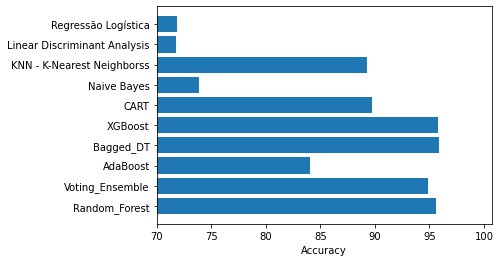

In [23]:
import numpy as np

fig, ax = plt.subplots()

y_pos = np.arange(len(Algoritmo))
ax.barh(y_pos, Accuracy, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(Algoritmo)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy')
ax.set_xbound(lower=70)
plt.show()

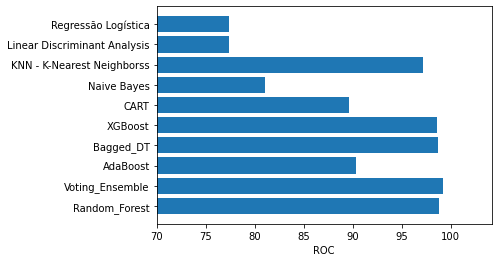

In [24]:
fig, ax = plt.subplots()

y_pos = np.arange(len(Algoritmo))
ax.barh(y_pos, ROC, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(Algoritmo)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('ROC')
ax.set_xbound(lower=70)
plt.show()

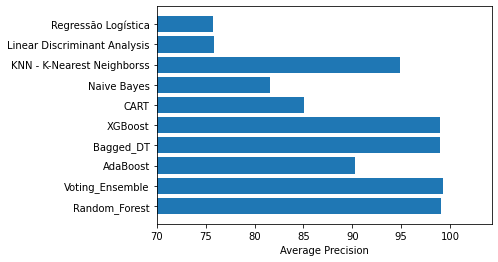

In [25]:
fig, ax = plt.subplots()

y_pos = np.arange(len(Algoritmo))
ax.barh(y_pos, Average_Precision, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(Algoritmo)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Average Precision')
ax.set_xbound(lower=70)
plt.show()

# Escolhemos o modelo Voting_Ensemble para medir a acurácia nos dados de teste

In [26]:
from sklearn.ensemble import RandomForestClassifier
# Definindo os valores para o número de folds
num_folds = 10
# Separando os dados em folds
kfold = KFold(num_folds, True)
# Cria o modelo unitário (classificador fraco)
cart = XGBClassifier()
# Definindo o número de trees
num_trees = 100
max_features = 3
# Criando o modelo bagging
modelo = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
resultado3 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'average_precision')
# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))
print("Average Precision: %.3f" % (resultado3.mean() * 100))

Acurácia: 95.581
ROC: 98.852
Average Precision: 99.027


In [27]:
# Salvando o modelo

In [28]:
import pickle
arquivo = 'modelo_regressor_final.sav'
pickle.dump(modelo, open(arquivo, 'wb'))
print("Modelo salvo!")

Modelo salvo!


In [29]:
# Usamos o Azure ML para normalizar o dataset de teste pelo método Zscore

In [30]:
dados = pd.read_csv('Azure_test.csv')
dados.churn.replace(('yes', 'no'), (1, 0), inplace=True)
array = dados.values
X_test = array[:,0:11]
Y_test = array[:,11]

In [31]:
# Fazendo previsões
from sklearn.metrics import accuracy_score
modelo.fit(X, Y)
y_pred = modelo.predict(X_test)
previsoes = [round(value) for value in y_pred]
accuracy = accuracy_score(Y_test, previsoes)
print("Acurácia: %.3f%%" % (accuracy * 100.0))

Acurácia: 80.564%


In [32]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test, previsoes)
print(matrix)

[[1179  264]
 [  60  164]]
